In [1]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data) 
df_diabetics.columns = column_name
df_diabetics.head() #mostra as 5 primeiras linhas


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Outlier


C:\Users\luiz-\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

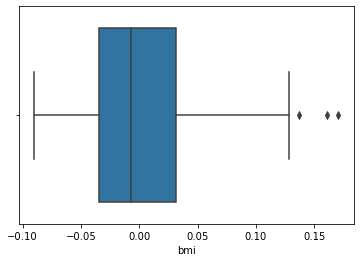

In [2]:
# Box Plot
import seaborn as sns
sns.boxplot(df_diabetics['bmi']) #o que tiver fora dos limites é outlier


In [3]:
# Position of the Outlier
import numpy as np
print(np.where(df_diabetics['bmi']>0.12))


(array([ 32, 145, 256, 262, 366, 367, 405], dtype=int64),)


Visualizing Outliers Using ScatterPlot.



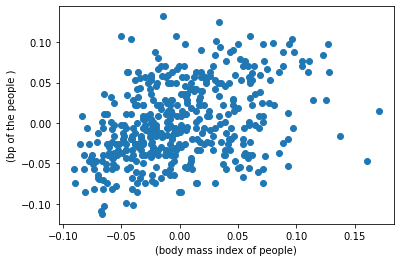

In [4]:
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df_diabetics['bmi'],df_diabetics['bp'])

# x-axis label
ax.set_xlabel('(body mass index of people)')

# y-axis label
ax.set_ylabel('(bp of the people )')
plt.show()


In [5]:
# Position of the Outlier
print(np.where((df_diabetics['bmi']>0.12) & (df_diabetics['bp']<0.8)))


(array([ 32, 145, 256, 262, 366, 367, 405], dtype=int64),)


Z-score

In [6]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_diabetics['age']))
print(z)



0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


In [7]:
threshold = 2

# Position of the outlier
print(np.where(z > 2))


(array([ 10,  26,  41,  77,  79, 106, 131, 204, 223, 226, 242, 311, 321,
       344, 374, 402], dtype=int64),)


IQR (Inter Quartile Range) 


In [9]:
# IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used
# and most trusted approach used in the research field.

# IQR = Quartile3 – Quartile1

Q1 = np.percentile(df_diabetics['bmi'], 25)
Q3 = np.percentile(df_diabetics['bmi'], 75)
IQR = Q3 - Q1
print(IQR)


0.06547708348826478


In [27]:
# To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower 
# bounds, define the upper and the lower bound (1.5*IQR value is considered) :

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df_diabetics['bmi']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df_diabetics['bmi']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())




Upper Bound: 0.12946364066395025
0
Lower Bound: -0.13244469328910888
0


Removing the outlier 

In [29]:
# dataframe.drop(row index,inplace=True)

# nplace =True is used to tell Python to make the required change in the original dataset. 
# row_index can be only one value or list of values or NumPy array but it must be one dimensional.


In [30]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi']>=upper)[0]
lower_array = np.where(df_diabetes['bmi']<=lower)[0]


# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetes.shape)


Old Shape:  (442, 10)
New Shape:  (439, 10)
